In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (12, 6)

Download stock price data from NSE [website](https://www.nseindia.com/products/content/equities/equities/eq_security.htm). Here I download stock price data for TCS stock.


In [3]:
df = pd.read_csv("~/Downloads/tcs.csv")
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,07-May-2018,3480.75,3490.00,3490.00,3410.9,3428.0,3420.95,3438.41,1742213,5.990435e+09,95521,1155927,66.35
1,TCS,EQ,08-May-2018,3420.95,3434.70,3486.50,3396.7,3440.2,3441.20,3447.80,1496410,5.159322e+09,75803,710340,47.47
2,TCS,EQ,09-May-2018,3441.20,3440.20,3494.75,3440.2,3488.5,3489.30,3480.95,1307525,4.551423e+09,74986,754487,57.70
3,TCS,EQ,10-May-2018,3489.30,3502.95,3511.15,3440.2,3446.3,3451.25,3478.59,1929339,6.711381e+09,78782,1044165,54.12
4,TCS,EQ,11-May-2018,3451.25,3454.20,3485.00,3442.5,3461.0,3456.95,3461.07,1313938,4.547637e+09,44332,734225,55.88


Check whether you have duplicate data on by date. It looks like 11/2/2019, 18/2/2019, 25/2/2019 etc. have duplicate data. Not sure why there are duplicates by date. It could be ammendment to the data.

In [4]:
df[df["Date"].duplicated(keep = False)]

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
191,TCS,BL,11-Feb-2019,2604.20,2061.40,2061.40,2061.40,2061.40,2061.40,2061.40,376308,7.757213e+08,1,0,0.00
192,TCS,EQ,11-Feb-2019,2061.40,2060.00,2096.00,2048.90,2065.60,2065.90,2077.11,1778730,3.694622e+09,83603,901516,50.68
197,TCS,BL,18-Feb-2019,2061.40,2029.70,2029.70,2029.70,2029.70,2029.70,2029.70,2474600,5.022696e+09,1,0,0.00
198,TCS,EQ,18-Feb-2019,2029.70,2037.60,2041.95,1962.65,1969.60,1970.30,1988.87,2942184,5.851634e+09,100585,1668905,56.72
203,TCS,BL,25-Feb-2019,2029.70,1925.65,1925.65,1925.65,1925.65,1925.65,1925.65,1057509,2.036392e+09,2,0,0.00
204,TCS,EQ,25-Feb-2019,1925.65,1932.50,1990.00,1930.50,1987.00,1985.15,1961.61,2934880,5.757095e+09,140541,1341508,45.71
221,TCS,BL,22-Mar-2019,1925.65,2015.05,2015.05,2015.05,2015.05,2015.05,2015.05,264913,5.338129e+08,1,264913,100.00
222,TCS,EQ,22-Mar-2019,2015.05,2015.00,2016.00,1983.30,2010.00,2005.65,1998.96,3148149,6.293032e+09,155770,1787595,56.78


Drop the duplicate from the dataset.

In [5]:
df = df[~df["Date"].duplicated()]

Convert the dataset into time series data by undating the index to time series index. 

In [6]:
df.index = pd.to_datetime(df["Date"])
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2018-05-07,TCS,EQ,07-May-2018,3480.75,3490.00,3490.00,3410.9,3428.0,3420.95,3438.41,1742213,5.990435e+09,95521,1155927,66.35
2018-05-08,TCS,EQ,08-May-2018,3420.95,3434.70,3486.50,3396.7,3440.2,3441.20,3447.80,1496410,5.159322e+09,75803,710340,47.47
2018-05-09,TCS,EQ,09-May-2018,3441.20,3440.20,3494.75,3440.2,3488.5,3489.30,3480.95,1307525,4.551423e+09,74986,754487,57.70
2018-05-10,TCS,EQ,10-May-2018,3489.30,3502.95,3511.15,3440.2,3446.3,3451.25,3478.59,1929339,6.711381e+09,78782,1044165,54.12
2018-05-11,TCS,EQ,11-May-2018,3451.25,3454.20,3485.00,3442.5,3461.0,3456.95,3461.07,1313938,4.547637e+09,44332,734225,55.88


In [7]:
df.index

DatetimeIndex(['2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2019-04-18', '2019-04-22', '2019-04-23', '2019-04-24',
               '2019-04-25', '2019-04-26', '2019-04-30', '2019-05-02',
               '2019-05-03', '2019-05-06'],
              dtype='datetime64[ns]', name='Date', length=246, freq=None)

Look at trend of close price. We see there is a price adjust has been done on 31/05/2018. Let's shift the origin of dataset to 1/Jun to avoid price adjustment.

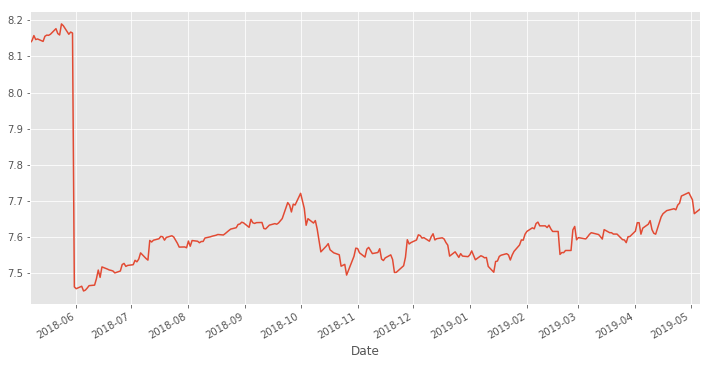

In [8]:
y = np.log(df["Close Price"])
y.plot()

In [9]:
y.index

DatetimeIndex(['2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2019-04-18', '2019-04-22', '2019-04-23', '2019-04-24',
               '2019-04-25', '2019-04-26', '2019-04-30', '2019-05-02',
               '2019-05-03', '2019-05-06'],
              dtype='datetime64[ns]', name='Date', length=246, freq=None)

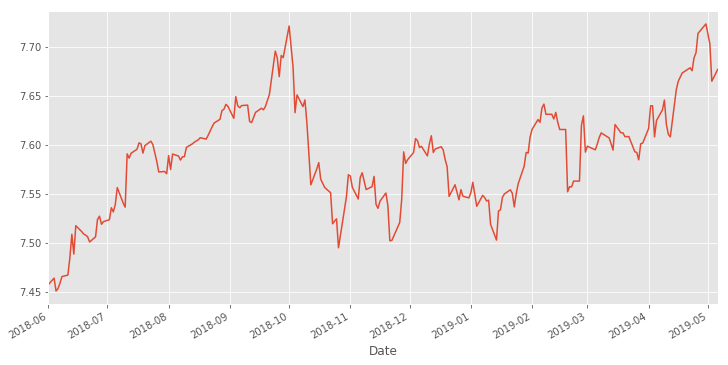

In [10]:
y = y[y.index>"2018-05-31"]
y.plot()

Let's see if there are gaps in the data in terms of date range. Trading does not happen on weekends or national holidays. So there is no data on those days. 

In [11]:
list(y.index[:10])

[Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-06-04 00:00:00'),
 Timestamp('2018-06-05 00:00:00'),
 Timestamp('2018-06-06 00:00:00'),
 Timestamp('2018-06-07 00:00:00'),
 Timestamp('2018-06-08 00:00:00'),
 Timestamp('2018-06-11 00:00:00'),
 Timestamp('2018-06-12 00:00:00'),
 Timestamp('2018-06-13 00:00:00'),
 Timestamp('2018-06-14 00:00:00')]

In [12]:
y.asfreq("D")[:15]

Date
2018-06-01    7.457292
2018-06-02         NaN
2018-06-03         NaN
2018-06-04    7.464080
2018-06-05    7.451009
2018-06-06    7.453417
2018-06-07    7.459080
2018-06-08    7.465713
2018-06-09         NaN
2018-06-10         NaN
2018-06-11    7.467200
2018-06-12    7.484930
2018-06-13    7.508842
2018-06-14    7.488601
2018-06-15    7.517548
Freq: D, Name: Close Price, dtype: float64

Let's impute the missing data by forward fill.

In [13]:
y = y.asfreq("D", method="ffill" )
y[:15]

Date
2018-06-01    7.457292
2018-06-02    7.457292
2018-06-03    7.457292
2018-06-04    7.464080
2018-06-05    7.451009
2018-06-06    7.453417
2018-06-07    7.459080
2018-06-08    7.465713
2018-06-09    7.465713
2018-06-10    7.465713
2018-06-11    7.467200
2018-06-12    7.484930
2018-06-13    7.508842
2018-06-14    7.488601
2018-06-15    7.517548
Freq: D, Name: Close Price, dtype: float64

Calculate quarterly high, low prices.

In [14]:
pd.DataFrame(dict(low=y.resample("Q").min(), 
                  high=y.resample("Q").max(), 
                  first = y.resample("Q").first(), 
                  last = y.resample("Q").last(),
                  median = y.resample("Q").median(),
                  mean = y.resample("Q").mean()
                 ))

,low,high,first,last,median,mean
Date,,,,,,
2018-06-30,7.451009,7.527256,7.457292,7.521724,7.500972,7.491879
2018-09-30,7.521724,7.695508,7.521724,7.688776,7.604433,7.609261
2018-12-31,7.495042,7.721149,7.721149,7.545945,7.559247,7.570085
2019-03-31,7.502876,7.641516,7.551082,7.601727,7.598600,7.586405
2019-06-30,7.608126,7.723275,7.616604,7.676868,7.664816,7.661284


Calculate rolling mean, exponentially weighted mean

In [15]:
period = 3
y_rolling = pd.DataFrame(dict(actual = y, 
                              rolling_mean = y.rolling(period).mean(), 
                              ewm = y.ewm(span = period).mean()
                             ))
y_rolling.head(10)

,actual,rolling_mean,ewm
Date,,,
2018-06-01,7.457292,NaN,7.457292
2018-06-02,7.457292,NaN,7.457292
2018-06-03,7.457292,7.457292,7.457292
2018-06-04,7.464080,7.459555,7.460912
2018-06-05,7.451009,7.457460,7.455801
2018-06-06,7.453417,7.456169,7.454590
2018-06-07,7.459080,7.454502,7.456853
2018-06-08,7.465713,7.459403,7.461300
2018-06-09,7.465713,7.463502,7.463511


By visual inspection, we see the time series is not stationary. Let we will see a more formal way of testing using Dickey Fullter Test. 

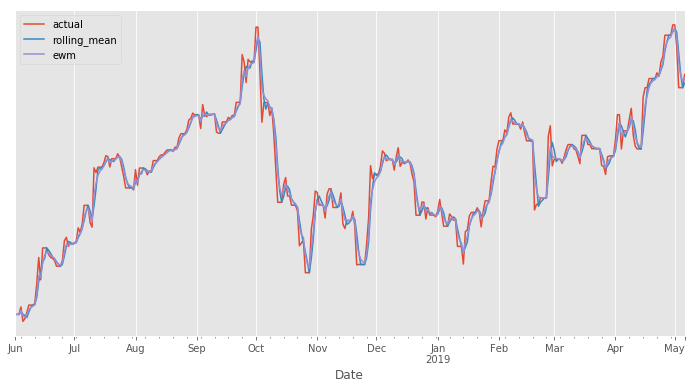

In [16]:
y_rolling.plot()

Formal of way of test for stationarity. Since the p-value of Augmented Dickey Fullter test is > 0.05, we can say that there is not sufficient proof that the time series is stationary. Loosely speaking, it is non-stationary. We need further transformation to make data stationary. Populary method for making data stationary will be to take "difference". Taking difference by lag one, we see the p-val for Dickey Fuller test is < 0.05. So we conclude, diff 1 has made the data stationary. 

In [17]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.560543
p-value: 0.101430


In [18]:
diff = pd.DataFrame({"actual": y, "diff1": y.diff(3)}).head(10)
diff["diff2"] = diff.diff1.diff(1)
diff

,actual,diff1,diff2
Date,,,
2018-06-01,7.457292,NaN,NaN
2018-06-02,7.457292,NaN,NaN
2018-06-03,7.457292,NaN,NaN
2018-06-04,7.464080,0.006788,NaN
2018-06-05,7.451009,-0.006283,-0.013071
2018-06-06,7.453417,-0.003875,0.002408
2018-06-07,7.459080,-0.005000,-0.001125
2018-06-08,7.465713,0.014703,0.019703
2018-06-09,7.465713,0.012296,-0.002408


In [19]:
result = adfuller(y.diff(periods=1).dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -13.737425
p-value: 0.000000


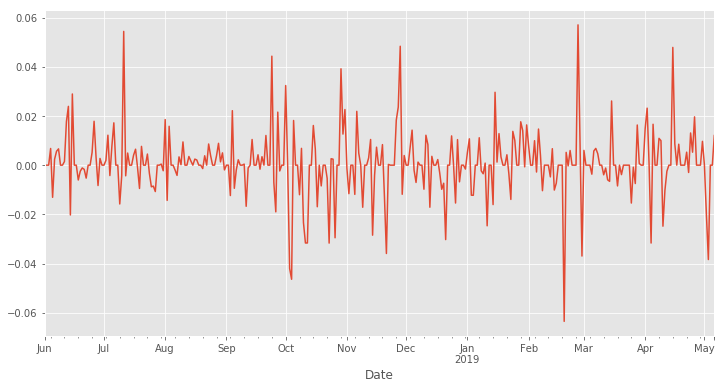

In [20]:
y.diff(periods=1).plot()

Use pandas's auto correlation plot. Here is a nice explanation of the [autocorrelation plot](https://stats.stackexchange.com/questions/357300/what-does-pandas-autocorrelation-graph-show) 

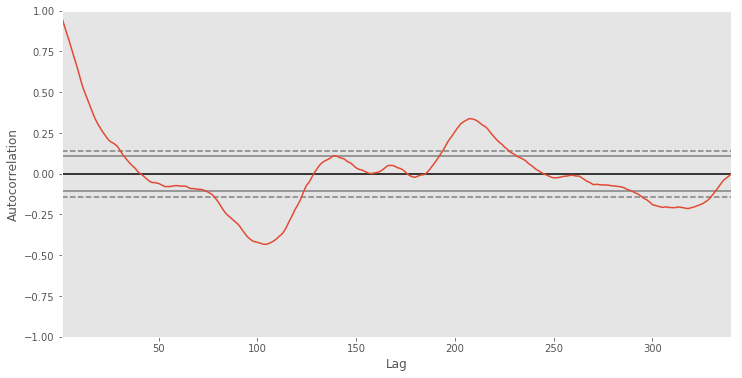

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)

                  0
count  3.390000e+02
mean  -6.232597e-07
std    1.301486e-02
min   -6.453965e-02
25%   -3.584534e-03
50%   -4.457160e-04
75%    4.079619e-03
max    5.633234e-02


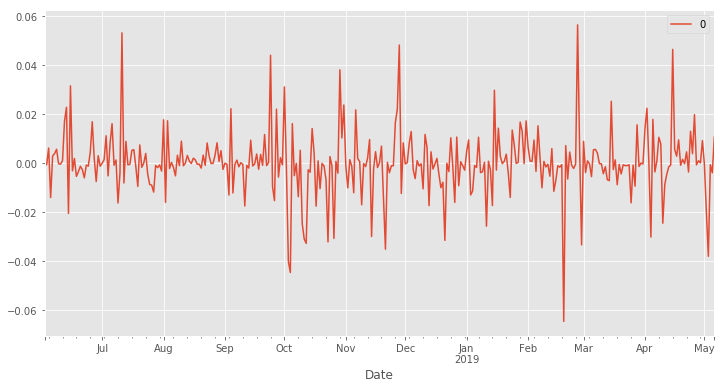

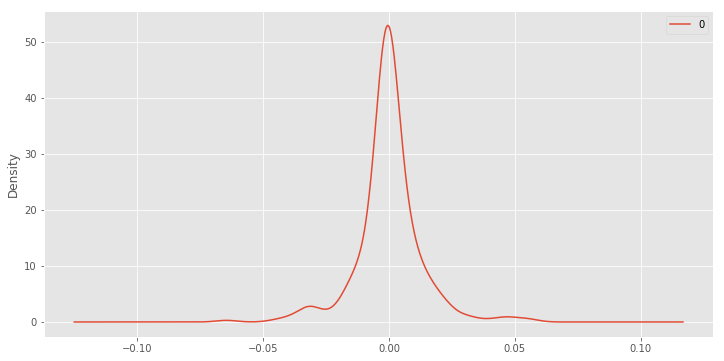

In [22]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(y, order=(5,1,0)) # p, d, q
model_fit = model.fit(disp=0)
#print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

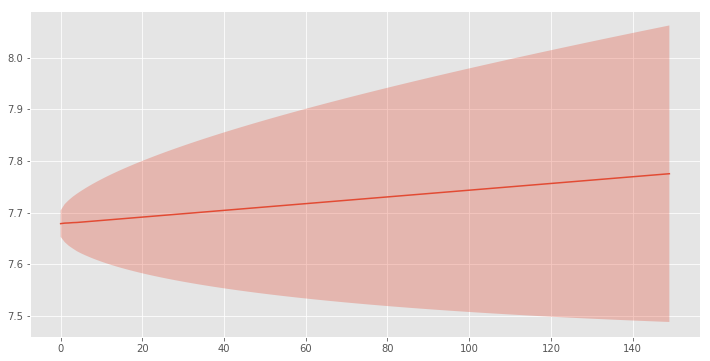

In [23]:
model = ARIMA(y.values, order=(5,1,0))
model_fit = model.fit(disp=0)
predictions, error, conf_interval = model_fit.forecast(150)
plt.plot(predictions)
plt.fill_between(range(len(predictions)), conf_interval[:,0], conf_interval[:,1], alpha = 0.3)

In [24]:
predictions[:10]

array([7.6787589 , 7.67975708, 7.6801224 , 7.6807255 , 7.68103294,
       7.68163888, 7.68230646, 7.6829775 , 7.68363045, 7.68429034])

In [25]:
error[:10]

array([0.01299563, 0.01879628, 0.02258796, 0.02566319, 0.02843215,
       0.03081504, 0.03301484, 0.03509737, 0.03707048, 0.0389422 ])

In [26]:
conf_interval[:10]

array([[7.65328795, 7.70422986],
       [7.64291705, 7.71659711],
       [7.63585081, 7.72439399],
       [7.63042658, 7.73102442],
       [7.62530695, 7.73675893],
       [7.62124252, 7.74203525],
       [7.61759855, 7.74701436],
       [7.61418793, 7.75176708],
       [7.61097365, 7.75628726],
       [7.60796503, 7.76061565]])

In [27]:
model.endog

array([ 0.        ,  0.        ,  0.00678807, -0.01307057,  0.00240765,
        0.00566263,  0.0066329 ,  0.        ,  0.        ,  0.00148707,
        0.01773066,  0.02391171, -0.02024075,  0.02894678,  0.        ,
        0.        , -0.00602338, -0.00246339, -0.00112423, -0.00170246,
       -0.00526295,  0.        ,  0.        ,  0.00520799,  0.01784181,
        0.0032345 , -0.00826875,  0.0027368 ,  0.        ,  0.        ,
        0.00194642,  0.01218676, -0.00422438,  0.00755385,  0.01721521,
        0.        ,  0.        , -0.0157803 , -0.00420426,  0.05438435,
       -0.00432775,  0.00493366,  0.        ,  0.        ,  0.0040803 ,
        0.00648906, -0.00094943, -0.00946851,  0.00764207,  0.        ,
        0.        ,  0.00452246, -0.00332114, -0.00879292, -0.00851457,
       -0.01072046,  0.        ,  0.        ,  0.0004372 , -0.00226524,
        0.01853654, -0.01431908,  0.01581051,  0.        ,  0.        ,
       -0.00197219, -0.00415938,  0.00337448,  0.00017729,  0.00

In [28]:
(predictions + 1.96 * error)[:10]

array([7.70423033, 7.71659778, 7.7243948 , 7.73102535, 7.73675995,
       7.74203636, 7.74701555, 7.75176834, 7.7562886 , 7.76061705])

In [29]:
(predictions - 1.96 * error)[:10]

array([7.65328748, 7.64291637, 7.63585   , 7.63042566, 7.62530593,
       7.62124141, 7.61759736, 7.61418666, 7.61097231, 7.60796363])

predicted=7.536537, actual=7.550425
predicted=7.552046, actual=7.560497
predicted=7.560923, actual=7.560497
predicted=7.560501, actual=7.560497
predicted=7.560612, actual=7.578145
predicted=7.578992, actual=7.592240
predicted=7.592386, actual=7.591559
predicted=7.591067, actual=7.607928
predicted=7.609021, actual=7.615766
predicted=7.615626, actual=7.615766
predicted=7.615776, actual=7.615766
predicted=7.616227, actual=7.625717
predicted=7.626630, actual=7.622933
predicted=7.622868, actual=7.637620
predicted=7.639138, actual=7.641516
predicted=7.641705, actual=7.631141
predicted=7.631042, actual=7.631141
predicted=7.632246, actual=7.631141
predicted=7.631652, actual=7.631141
predicted=7.631906, actual=7.626375
predicted=7.626959, actual=7.633079
predicted=7.634334, actual=7.622957
predicted=7.622854, actual=7.615643
predicted=7.616467, actual=7.615643
predicted=7.616651, actual=7.615643
predicted=7.616271, actual=7.615643
predicted=7.616467, actual=7.552132
predicted=7.549410, actual=7

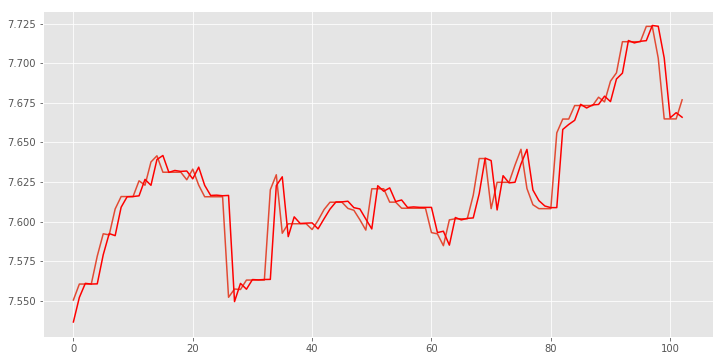

In [30]:
from sklearn.metrics import mean_squared_error

x = y.values
train_size = int(len(x) * 0.7)
train, test = x[0:train_size], x[train_size:]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0][0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, actual=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % np.sqrt(error))

plt.plot(test)
plt.plot(predictions, color='red')


In [31]:
result = pd.DataFrame(y)[train_size:]
result.columns = ["actual"]
result["prediction"] = predictions
result

,actual,prediction
Date,,
2019-01-24,7.550425,7.536537
2019-01-25,7.560497,7.552046
2019-01-26,7.560497,7.560923
2019-01-27,7.560497,7.560501
2019-01-28,7.578145,7.560612
2019-01-29,7.592240,7.578992
2019-01-30,7.591559,7.592386
2019-01-31,7.607928,7.591067
2019-02-01,7.615766,7.609021
